In [1]:
# codes for colaboratory
# from google.colab import drive
# drive.mount('/content/drive/')

In [2]:
# codes for work on drive 
# import os
# os.chdir("/content/drive/My Drive/Kuulab")
# !pwd

# import warnings
# warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#import data and see features
data=pd.read_csv("online_shoppers_intention.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  int64  
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  int64  
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  int64  
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12316 non-null  float64
 9   SpecialDay               12316 non-null  float64
 10  Month                    12316 non-null  object 
 11  OperatingSystems         12316 non-null  int64  
 12  Browser                  12316 non-null  int64  
 13  Region                   12316 non-null  int64  
 14  TrafficType           

In [4]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
#we delete negative time variables, time can't be negative
data.dropna(inplace=True)
data = data.drop(data[data['Administrative_Duration'] < 0].index)
data = data.drop(data[data['Informational_Duration'] < 0].index)
data = data.drop(data[data['ProductRelated_Duration'] < 0].index)
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000
mean,2.323862,81.126229,0.505333,34.601780,31.846536,1199.253065,0.021723,0.042611,5.911793,0.061532,2.124318,2.356997,3.147114,4.071969
std,3.325128,177.046838,1.272138,141.002498,44.521443,1915.935446,0.047686,0.047964,18.600350,0.199122,0.911718,1.717264,2.401981,4.025428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,187.100000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,602.500000,0.003077,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.950000,0.000000,0.000000,38.000000,1470.909852,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,9,98.944444,1,600.0,124,5731.094444,0.018346,0.033718,1.914175,0.2,May,2,2,3,13,Returning_Visitor,False,False
1,9,98.266667,3,144.5,37,1630.137415,0.019565,0.038038,0.000000,0.0,Nov,3,2,7,3,Returning_Visitor,False,True
2,9,97.642857,0,0.0,37,584.595887,0.005128,0.013043,0.000000,0.0,Mar,2,4,1,3,Returning_Visitor,True,False
3,9,965.500000,0,0.0,30,1895.133333,0.005405,0.011186,0.000000,0.0,Dec,3,2,3,2,Returning_Visitor,True,False
4,9,96.186667,1,35.2,63,1345.136667,0.029167,0.053287,2.101850,0.0,Jul,2,2,9,13,Returning_Visitor,False,False


In [7]:
data.duplicated().sum()

117

In [8]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [9]:
#converting boolean values to int
data['Weekend']=data['Weekend']*1
data['Revenue']=data['Revenue']*1
print("----head----")
data.head()

----head----


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,9,98.944444,1,600.0,124,5731.094444,0.018346,0.033718,1.914175,0.2,May,2,2,3,13,Returning_Visitor,0,0
1,9,98.266667,3,144.5,37,1630.137415,0.019565,0.038038,0.000000,0.0,Nov,3,2,7,3,Returning_Visitor,0,1
2,9,97.642857,0,0.0,37,584.595887,0.005128,0.013043,0.000000,0.0,Mar,2,4,1,3,Returning_Visitor,1,0
3,9,965.500000,0,0.0,30,1895.133333,0.005405,0.011186,0.000000,0.0,Dec,3,2,3,2,Returning_Visitor,1,0
4,9,96.186667,1,35.2,63,1345.136667,0.029167,0.053287,2.101850,0.0,Jul,2,2,9,13,Returning_Visitor,0,0


<class 'pandas.core.frame.DataFrame'>


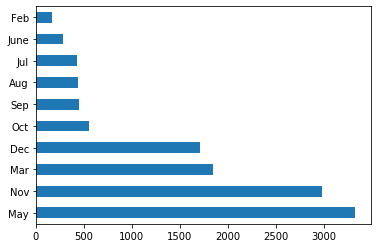

In [10]:
#distirbution of month feature
print(type(data))
data.Month.value_counts().plot(kind='barh')

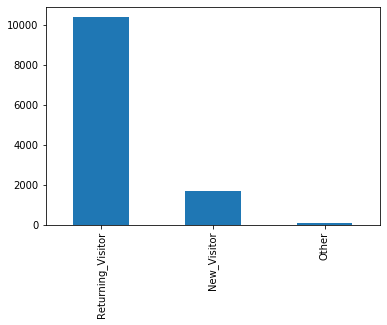

In [11]:
data.VisitorType.value_counts().plot(kind='bar')

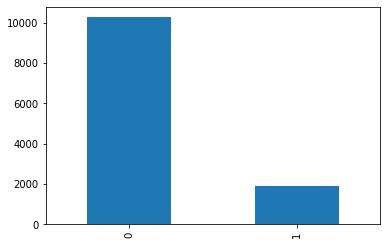

In [12]:

data.Revenue.value_counts().plot(kind='bar')
# Considering this visualization output, it was predicted that there might be an overfitting problem.

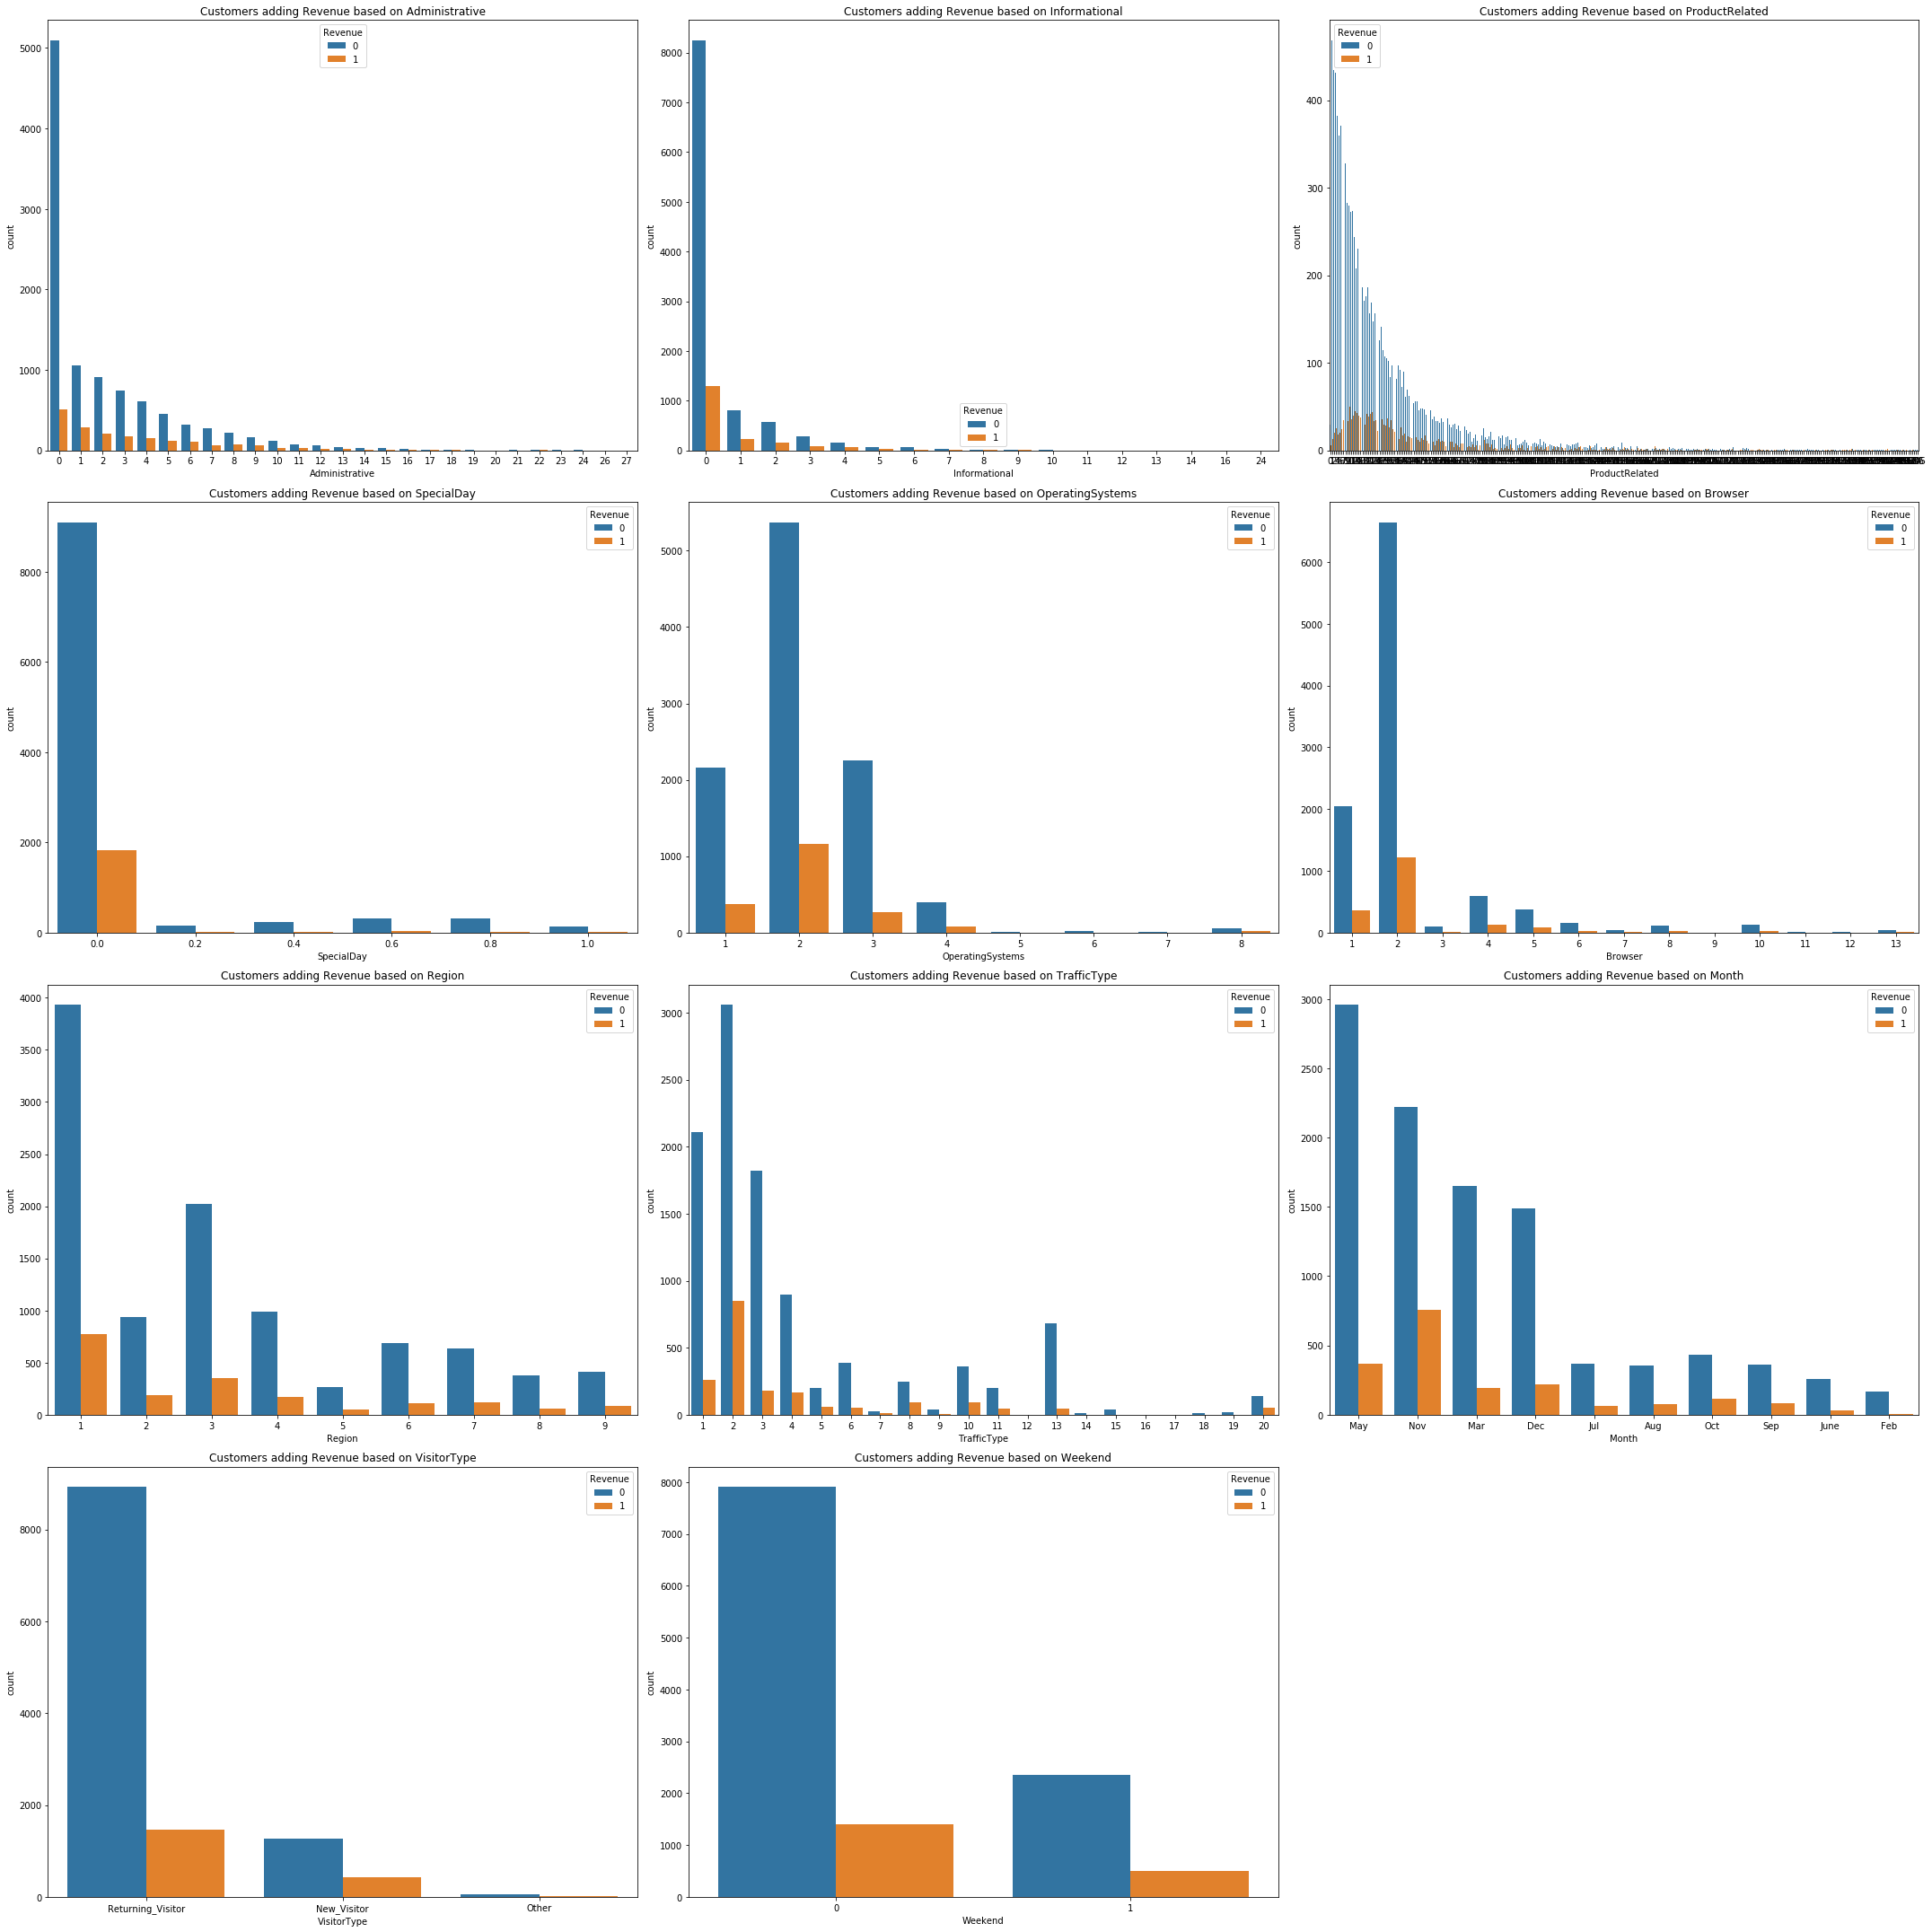

In [13]:
cols=['Administrative','Informational','ProductRelated','SpecialDay','OperatingSystems','Browser','Region','TrafficType','Month','VisitorType','Weekend']    
plt.figure(figsize=(30,30))
plot_number = 0
for i in cols:
    plot_number = plot_number + 1
    ax = plt.subplot(4, 3, plot_number,adjustable='datalim')
    sns.countplot(data[i],hue=data['Revenue'])
    ax.set_title('Customers adding Revenue based on '+ i,fontdict=None)
    plt.tight_layout()

The plots you see above give the distributional data required for analysis.

In [14]:
#prepocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler
#encoding for visitor type

visitortY1pe=data.iloc[:,15].values
label_encoder = LabelEncoder()
visitor_tY1pe=pd.DataFrame(label_encoder.fit_transform(visitortY1pe))

In [15]:
# simple encoding for month feature and visitor type
Month=data.iloc[:,10].values

Month=pd.DataFrame(label_encoder.fit_transform(Month))
Month.columns=['Month']
visitor_tY1pe.columns=['VisitorType']

In [16]:
data=data.drop(['Month','VisitorType'],axis=1)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
0,9,98.944444,1,600.0,124,5731.094444,0.018346,0.033718,1.914175,0.2,2,2,3,13,0,0
1,9,98.266667,3,144.5,37,1630.137415,0.019565,0.038038,0.000000,0.0,3,2,7,3,0,1
2,9,97.642857,0,0.0,37,584.595887,0.005128,0.013043,0.000000,0.0,2,4,1,3,1,0
3,9,965.500000,0,0.0,30,1895.133333,0.005405,0.011186,0.000000,0.0,3,2,3,2,1,0
4,9,96.186667,1,35.2,63,1345.136667,0.029167,0.053287,2.101850,0.0,2,2,9,13,0,0


In [17]:
df=pd.concat([data,Month,visitor_tY1pe],axis=1)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month,VisitorType
0,9.0,98.944444,1.0,600.0,124.0,5731.094444,0.018346,0.033718,1.914175,0.2,2.0,2.0,3.0,13.0,0.0,0.0,6.0,2.0
1,9.0,98.266667,3.0,144.5,37.0,1630.137415,0.019565,0.038038,0.000000,0.0,3.0,2.0,7.0,3.0,0.0,1.0,7.0,2.0
2,9.0,97.642857,0.0,0.0,37.0,584.595887,0.005128,0.013043,0.000000,0.0,2.0,4.0,1.0,3.0,1.0,0.0,5.0,2.0
3,9.0,965.500000,0.0,0.0,30.0,1895.133333,0.005405,0.011186,0.000000,0.0,3.0,2.0,3.0,2.0,1.0,0.0,1.0,2.0
4,9.0,96.186667,1.0,35.2,63.0,1345.136667,0.029167,0.053287,2.101850,0.0,2.0,2.0,9.0,13.0,0.0,0.0,3.0,2.0


In [18]:
# We need to fix class inequality to avoid overfitting problem
# We apply this process to eliminate the class inequality


df1=df[df['Revenue']==1]
print("Revenue ones-df1:"+ str(df1.shape))
df2=df[df['Revenue']==0]
print("Not Revenue-df2:"+ str(df2.shape))
df0_1=df1.append(df2[:len(df1)])
print(str(df0_1.shape))


Revenue ones-df1:(1908, 18)
Not Revenue-df2:(10258, 18)
(3816, 18)


In [19]:
Y=df0_1['Revenue']
X=pd.DataFrame(df0_1.drop(['Revenue'],axis=1))
X2=X.copy()
X=X.dropna()
X.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Month,VisitorType
1,9.0,98.266667,3.0,144.5,37.0,1630.137415,0.019565,0.038038,0.000000,0.0,3.0,2.0,7.0,3.0,0.0,7.0,2.0
5,9.0,904.583333,4.0,83.5,132.0,4096.158590,0.012738,0.022973,8.960748,0.0,3.0,2.0,3.0,2.0,1.0,7.0,2.0
7,9.0,88.604167,0.0,0.0,114.0,2997.002030,0.000000,0.005990,32.567257,0.0,2.0,4.0,2.0,2.0,0.0,7.0,2.0
8,9.0,87.800000,1.0,12.0,120.0,2016.564401,0.006452,0.012614,33.411738,0.0,2.0,2.0,7.0,13.0,0.0,3.0,2.0
12,9.0,81.000000,0.0,0.0,34.0,1219.113725,0.007018,0.022556,9.517421,0.0,3.0,2.0,3.0,1.0,0.0,5.0,2.0


In [20]:
#scaling
sclr=StandardScaler()
column_names=list(X.columns)
X=sclr.fit_transform(X)
X=pd.DataFrame(X,columns=column_names)
X.head()
 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Month,VisitorType
0,1.393353,-0.274319,1.383362,0.463124,-0.189283,-0.071253,1.169650,1.115631,-0.546857,-0.214058,0.983972,-0.198937,1.582758,-0.244840,-0.585823,0.693895,0.464211
1,1.393353,3.434327,2.027446,0.126745,1.535634,0.955641,0.579995,0.160044,-0.236694,-0.214058,0.983972,-0.198937,-0.068928,-0.506404,1.706999,0.693895,0.464211
2,1.393353,-0.318762,-0.548889,-0.333709,1.208807,0.497933,-0.520189,-0.917215,0.580411,-0.214058,-0.110414,0.960944,-0.481850,-0.506404,-0.585823,0.693895,0.464211
3,1.393353,-0.322461,0.095195,-0.267536,1.317749,0.089662,0.037034,-0.497070,0.609642,-0.214058,-0.110414,-0.198937,1.582758,2.370806,-0.585823,-0.955375,0.464211
4,1.393353,-0.353737,-0.548889,-0.333709,-0.243754,-0.242410,0.085913,0.133614,-0.217425,-0.214058,0.983972,-0.198937,-0.068928,-0.767969,-0.585823,-0.130740,0.464211


In [21]:
#split data into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=1)

In [22]:
#svm modeling
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC

In [23]:
#future elimination
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [24]:
Svm_model=SVC(kernel='linear',C=1.0)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=7, random_state=1)
svm_scores = cross_val_score(Svm_model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Firsrt decission tree model accuracy: %.3f (%.3f)'% (np.mean(svm_scores), np.std(svm_scores)))

Svm_model.fit(x_train,y_train)
pred=Svm_model.predict(x_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

Firsrt decission tree model accuracy: 0.824 (0.021)
              precision    recall  f1-score   support

         0.0       0.76      0.91      0.83       610
         1.0       0.89      0.73      0.80       650

    accuracy                           0.82      1260
   macro avg       0.83      0.82      0.81      1260
weighted avg       0.83      0.82      0.81      1260

[[553  57]
 [176 474]]


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
# decision tree model
dtc_model=DecisionTreeClassifier(max_depth=50,random_state=0)
dtc_model.fit(x_train,y_train)

n1_scores = cross_val_score(dtc_model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n1_scores), np.std(n1_scores)))

pred2=dtc_model.predict(x_test)
print(classification_report(y_test,pred2))
print(confusion_matrix(y_test,pred2))


Accuracy: 0.840 (0.019)
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       610
         1.0       0.83      0.84      0.83       650

    accuracy                           0.83      1260
   macro avg       0.83      0.83      0.83      1260
weighted avg       0.83      0.83      0.83      1260

[[500 110]
 [107 543]]


In [27]:
#feature importanse 
importance = dtc_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.51887
Feature: 1, Score: 0.03309
Feature: 2, Score: 0.00625
Feature: 3, Score: 0.01281
Feature: 4, Score: 0.04801
Feature: 5, Score: 0.03483
Feature: 6, Score: 0.02852
Feature: 7, Score: 0.03637
Feature: 8, Score: 0.18096
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.01305
Feature: 11, Score: 0.01220
Feature: 12, Score: 0.01739
Feature: 13, Score: 0.01895
Feature: 14, Score: 0.00219
Feature: 15, Score: 0.03518
Feature: 16, Score: 0.00134


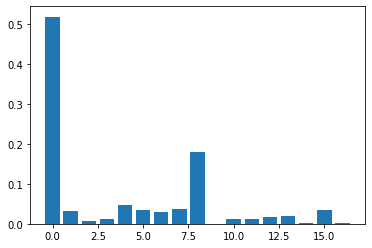

In [28]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

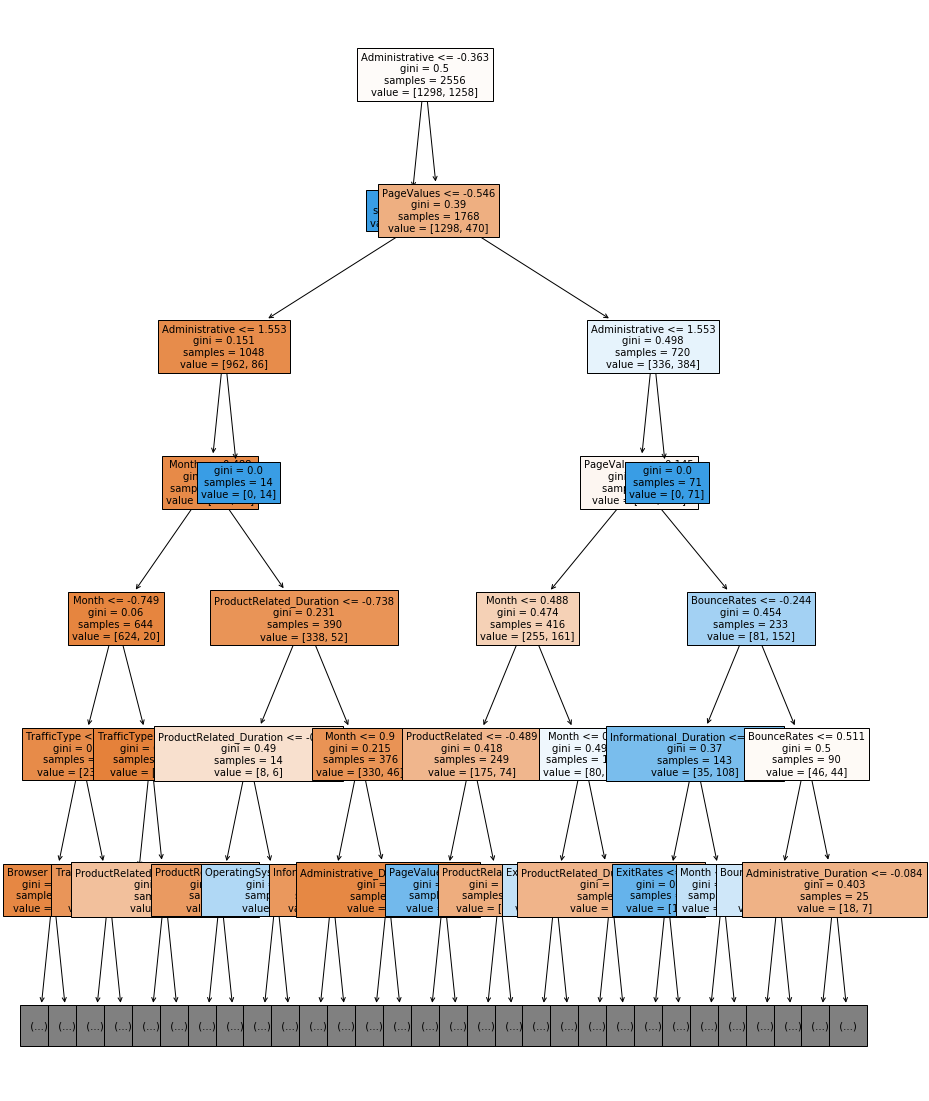

In [29]:
from sklearn.tree import plot_tree

columns_list = pd.DataFrame(X).columns.values.tolist()

plt.figure(figsize=(15,20))
plot_tree(dtc_model, max_depth=6,filled=True, feature_names=columns_list, fontsize=10)
plt.show()

In [30]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=15)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

n_scores = cross_val_score(pipeline, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Firsrt decission tree model accuracy: %.3f (%.3f)'% (np.mean(n1_scores), np.std(n1_scores)))
print('After RFE accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
# RFE can change every running

#score
pipeline.fit(x_train,y_train)
predx = pipeline.predict(x_test)
print(classification_report(y_test,predx))

Firsrt decission tree model accuracy: 0.840 (0.019)
After RFE accuracy: 0.838 (0.019)
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.83       610
         1.0       0.84      0.85      0.84       650

    accuracy                           0.84      1260
   macro avg       0.84      0.84      0.84      1260
weighted avg       0.84      0.84      0.84      1260



In [31]:
#random forrest modeling
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier(n_estimators=60, random_state=1)
rfc_scores = cross_val_score(rfc_model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('rfc accuracy: %.3f (%.3f)' % (np.mean(rfc_scores), np.std(rfc_scores)))
rfc_model.fit(x_train,y_train)
predx=rfc_model.predict(x_test)
print(classification_report(y_test,predx))
print(confusion_matrix(y_test,predx))


rfc accuracy: 0.878 (0.017)
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       610
         1.0       0.92      0.85      0.88       650

    accuracy                           0.88      1260
   macro avg       0.89      0.89      0.88      1260
weighted avg       0.89      0.88      0.88      1260

[[560  50]
 [ 96 554]]


In [32]:
#new things for optimization
X2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Month,VisitorType
1,9.0,98.266667,3.0,144.5,37.0,1630.137415,0.019565,0.038038,0.000000,0.0,3.0,2.0,7.0,3.0,0.0,7.0,2.0
5,9.0,904.583333,4.0,83.5,132.0,4096.158590,0.012738,0.022973,8.960748,0.0,3.0,2.0,3.0,2.0,1.0,7.0,2.0
7,9.0,88.604167,0.0,0.0,114.0,2997.002030,0.000000,0.005990,32.567257,0.0,2.0,4.0,2.0,2.0,0.0,7.0,2.0
8,9.0,87.800000,1.0,12.0,120.0,2016.564401,0.006452,0.012614,33.411738,0.0,2.0,2.0,7.0,13.0,0.0,3.0,2.0
12,9.0,81.000000,0.0,0.0,34.0,1219.113725,0.007018,0.022556,9.517421,0.0,3.0,2.0,3.0,1.0,0.0,5.0,2.0


In [33]:
X21=X2[["Administrative_Duration","Informational_Duration","ProductRelated","ProductRelated_Duration","BounceRates","ExitRates","PageValues"]]
X21

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
1,98.266667,144.5,37.0,1630.137415,0.019565,0.038038,0.000000
5,904.583333,83.5,132.0,4096.158590,0.012738,0.022973,8.960748
7,88.604167,0.0,114.0,2997.002030,0.000000,0.005990,32.567257
8,87.800000,12.0,120.0,2016.564401,0.006452,0.012614,33.411738
12,81.000000,0.0,34.0,1219.113725,0.007018,0.022556,9.517421
...,...,...,...,...,...,...,...
2457,158.000000,0.0,18.0,567.750000,0.000000,0.034586,0.000000
2458,157.000000,0.0,41.0,896.066667,0.000000,0.013043,4.430348
2460,155.500000,0.0,20.0,588.900000,0.000000,0.008696,0.000000
2461,155.500000,0.0,13.0,474.833333,0.000000,0.006250,0.000000


In [34]:
cnames=X21.columns.to_list()
cnames.append('SpecialDay')
print(cnames)
X22 = X2.drop(cnames,axis=1).astype(int,copy=True)
type(X22)

['Administrative_Duration', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']


pandas.core.frame.DataFrame

In [35]:
X22

,Administrative,Informational,OperatingSystems,Browser,Region,TrafficType,Weekend,Month,VisitorType
1,9,3,3,2,7,3,0,7,2
5,9,4,3,2,3,2,1,7,2
7,9,0,2,4,2,2,0,7,2
8,9,1,2,2,7,13,0,3,2
12,9,0,3,2,3,1,0,5,2
...,...,...,...,...,...,...,...,...,...
2457,4,0,3,2,2,4,0,6,2
2458,4,0,2,6,2,13,0,6,2
2460,4,0,4,1,1,4,0,6,0
2461,4,0,3,2,1,1,0,5,2


In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [37]:
# x21_cnames=X21.columns.to_list()
# x22_cnames=X22.columns.to_list()
# pipe2=ColumnTransformer([
#     ("numeric",StandardScaler(),x21_cnames),
#     ("discrete",OneHotEncoder(),x22_cnames)
# ])


# # ohe=OneHotEncoder()
# # X22=ohe.fit_transform(X22).toarray()
# # print(X22)
# # X32=pd.get_dummies(X22,drop_first=True)
# # X32

In [38]:
X21=pd.DataFrame(StandardScaler().fit_transform(X21))
X22=pd.DataFrame(OneHotEncoder().fit_transform(X22).toarray())
X22

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3812,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3813,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3814,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
X23=pd.concat([X21,X22],axis=1)
X23.head()

,0,1,2,3,4,5,6,0,1,2,...,87,88,89,90,91,92,93,94,95,96
0,-0.274319,0.463124,-0.189283,-0.071253,1.169650,1.115631,-0.546857,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,3.434327,0.126745,1.535634,0.955641,0.579995,0.160044,-0.236694,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.318762,-0.333709,1.208807,0.497933,-0.520189,-0.917215,0.580411,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.322461,-0.267536,1.317749,0.089662,0.037034,-0.497070,0.609642,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.353737,-0.333709,-0.243754,-0.242410,0.085913,0.133614,-0.217425,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X23,Y,test_size=0.33,random_state=1)
rfc_model2=RandomForestClassifier(n_estimators=60, random_state=1)
rfc_model2.fit(x2_train,y2_train)
preddx=rfc_model2.predict(x2_test)
print(classification_report(y2_test,preddx))
print(confusion_matrix(y2_test,preddx))

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       610
         1.0       0.91      0.85      0.88       650

    accuracy                           0.88      1260
   macro avg       0.88      0.88      0.88      1260
weighted avg       0.88      0.88      0.88      1260

[[553  57]
 [100 550]]


In [41]:
dt_model2 = DecisionTreeClassifier()
dt_model2.fit(x2_train,y2_train)
preddx=dt_model2.predict(x2_test)
print(classification_report(y2_test,preddx))
print(confusion_matrix(y2_test,preddx))

              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       610
         1.0       0.84      0.82      0.83       650

    accuracy                           0.82      1260
   macro avg       0.82      0.82      0.82      1260
weighted avg       0.82      0.82      0.82      1260

[[505 105]
 [117 533]]
